In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam, RMSprop

In [3]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
#count the number of unique train labels
unique,counts=np.unique(y_train,return_counts=True)
print('Train labels:', dict(zip(unique,counts)))

#count the number of unique test labels
unique,counts=np.unique(y_test,return_counts=True)
print('Test labels:', dict(zip(unique,counts)))

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [5]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [21]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

[25827  7280 55617 42863  4967 29197 53596 46273 55429 13294 32470 50942
 50124 44891 15103 23185 56236 17318 57309 50897 24450 30699 37605  6912
 42351]


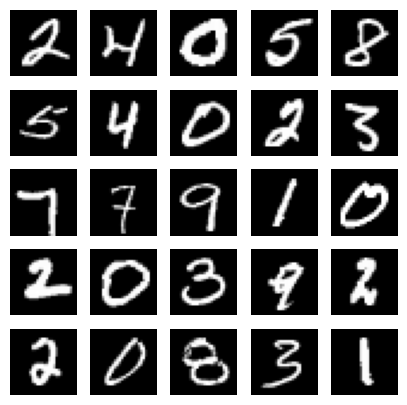

In [6]:
#sample 25 mnist digots from train dataset
indexes=np.random.randint(0,x_train.shape[0],size=25)
print(indexes)
images=x_train[indexes]
labels=y_train[indexes]

#plot 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5,5,i+1)
    image=images[i]
    plt.imshow(image,cmap='gray')
    plt.axis('off')
plt.show()
plt.savefig('mnist-samples.png')
plt.close('all')

In [7]:
from keras.utils import to_categorical,plot_model

In [8]:
#compute number of labels
num_labels=len(np.unique(y_train))

In [9]:
image_size=x_train.shape[1]
input_size=image_size*image_size
input_size

784

In [10]:
x_train=np.reshape(x_train,[-1,input_size])
x_train=x_train.astype('float32')/255
x_test=np.reshape(x_test,[-1,input_size])
x_test=x_test.astype('float32')/255

In [11]:
#network parameters
batch_size=128
hidden_units=256
#dropout=0.45


In [12]:
#model is a three layer MPL with ReLU and dropout after each layer
model=Sequential()
model.add(Dense(hidden_units,input_dim=input_size))
model.add(Activation('relu'))
#model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
#model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trai

In [14]:
plot_model(model,to_file='mpl-mnist.png',show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [15]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [16]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [18]:
history=model.fit(x_train,y_train,epochs=20,batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2647 - accuracy: 0.9226
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0971 - accuracy: 0.9708
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0650 - accuracy: 0.9802
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0451 - accuracy: 0.9860
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0346 - accuracy: 0.9889
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0266 - accuracy: 0.9913
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0207 - accuracy: 0.9933
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0159 - accuracy: 0.9949
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0147 - accuracy: 0.9952
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0102 - accuracy: 0.9966

In [19]:
loss,acc=model.evaluate(x_test,y_test,batch_size=batch_size)
print('Test Accuracy:',(100*acc))

79/79 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.9824
Test Accuracy: 98.24000000953674
